In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wc
import numpy as np
import re
from urlextract import URLExtract
extract=URLExtract()



KeyboardInterrupt: 

In [3]:
f=open('divyanshu.txt','r',encoding='utf-8')
data=f.read()

In [4]:
print(data)

16/04/2021, 3:39 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
16/04/2021, 3:39 pm - Your security code with Divyanshu Hindu Stats 273 changed. Tap to learn more.
06/08/2021, 9:43 am - Divyanshu Hindu Stats 273: Hello bro
06/08/2021, 9:43 am - Divyanshu Hindu Stats 273: Do you have solution of maths assignment set b?
06/08/2021, 10:05 am - Bhuvnesh Sahu: Which question
06/08/2021, 10:19 am - Divyanshu Hindu Stats 273: Full assignment?
06/08/2021, 10:23 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:23 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:23 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:25 am - Divyanshu Hindu Stats 273: Thankyou bro
06/08/2021, 10:25 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:28 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:28 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:28 am - Bhuvnesh Sahu: <Media omitted>
06/08/2021, 10:28 am 

In [341]:
def chat(data,time_format,user='overall'):
    #data=data.read()
    if time_format==12:
        pattern = '\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s[a-z][a-z]\s-\s'
        dates=re.findall(pattern,data)
        dates=[i for i in map(rep,dates)]
        dates=pd.to_datetime(dates, format='%d/%m/%Y, %I:%M %p - ')
    else:
        pattern = '\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s-\s'
        ates=re.findall(pattern,data)
    msg=re.split(pattern,data)[1:]
    df=pd.DataFrame({'msg':msg,'date':dates})
    df['hour']=df['date'].dt.hour
    df['hour_range'] = df['hour'].apply(lambda x: str(x)+'-'+str(int(x)+1))
    df['month']=df['date'].dt.month_name()
    df['dow']=df['date'].dt.day_name()
    df['user'], df['message'] = zip(*df['msg'].apply(lambda x: (x.split(':')[0][0:15], x.split(':')[1].strip()) if len(x.split(':')) > 1 else ('group_notification', '')))
    print(df['message'].head(50))
    df.drop('msg',axis=1,inplace=True)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    df.user.value_counts().plot(kind='bar')
    plt.title('user')
    plt.subplot(222)
    df.dow.value_counts().plot(kind='bar')
    plt.subplot(223)
    df.month.value_counts().plot(kind='bar')
    plt.subplot(224)
    df.hour_range.value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.show()
rep=lambda x: x.replace('\u202f', ' ')

0                                                    
1                                                    
2                                           Hello bro
3     Do you have solution of maths assignment set b?
4                                      Which question
5                                    Full assignment?
6                                     <Media omitted>
7                                     <Media omitted>
8                                     <Media omitted>
9                                        Thankyou bro
10                                    <Media omitted>
11                                    <Media omitted>
12                                    <Media omitted>
13                                    <Media omitted>
14                                    <Media omitted>
15                                    <Media omitted>
16                                    <Media omitted>
17                                    <Media omitted>
18                          

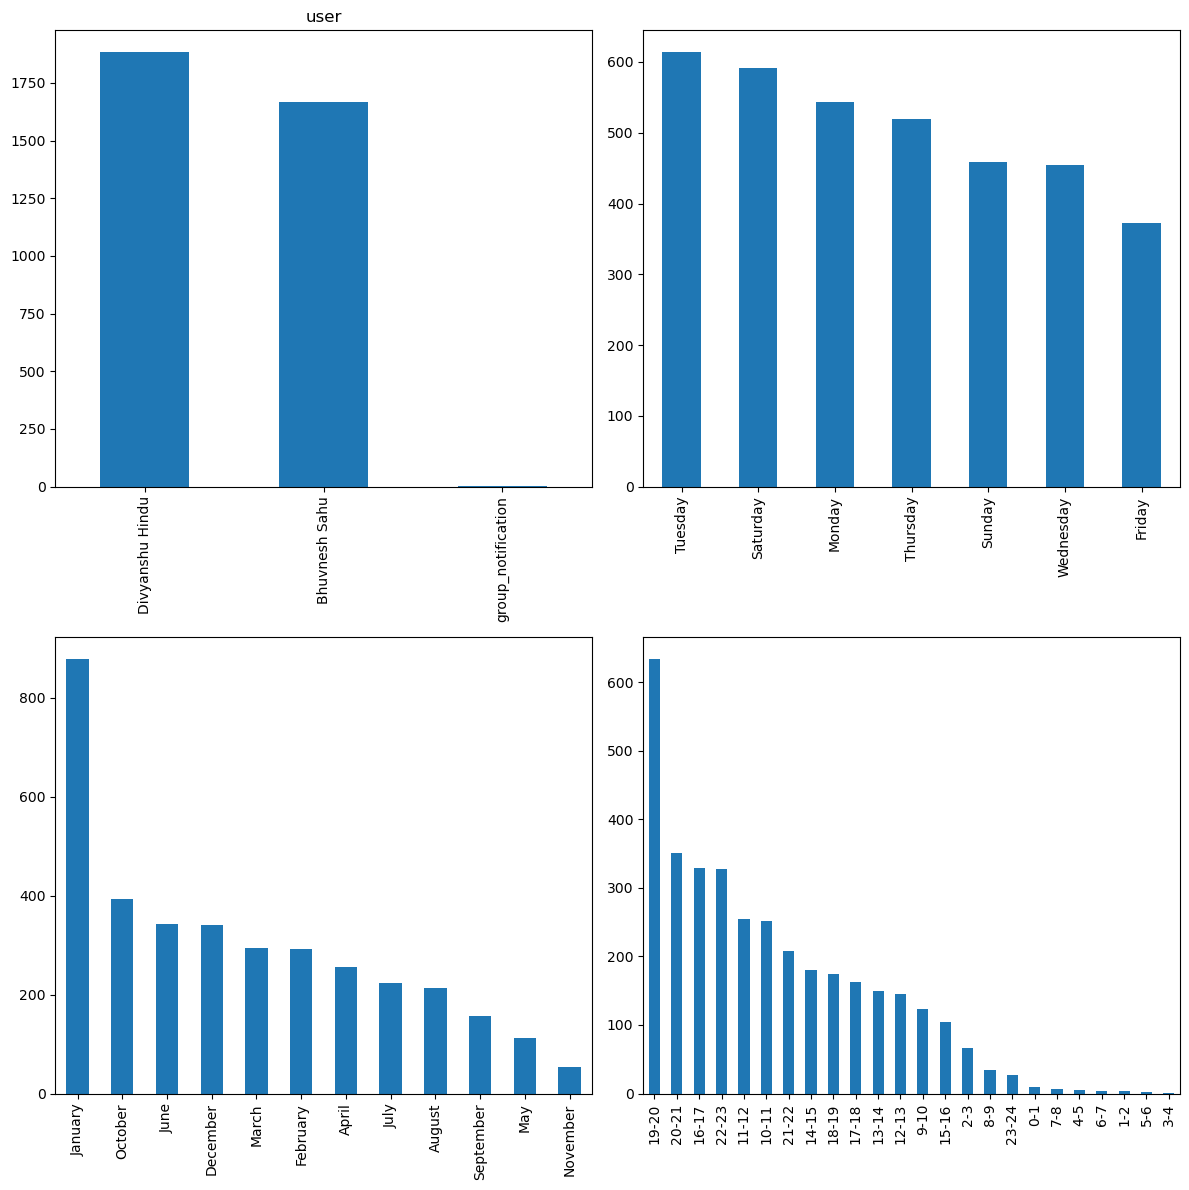

In [342]:
chat(data,12)

In [344]:

pattern = '\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s[a-z][a-z]\s-\s'
dates=re.findall(pattern,data)
dates=[i for i in map(rep,dates)]
dates=pd.to_datetime(dates, format='%d/%m/%Y, %I:%M %p - ')

msg=re.split(pattern,data)[1:]
df=pd.DataFrame({'msg':msg,'date':dates})
df['hour']=df['date'].dt.hour
df['hour_range'] = df['hour'].apply(lambda x: str(x)+'-'+str(int(x)+1))
df['month']=df['date'].dt.strftime('%B')
df['dow']=df['date'].dt.day_name()
df['user'], df['message'] = zip(*df['msg'].apply(lambda x: (x.split(':')[0][0:15], x.split(':')[1].strip()) if len(x.split(':')) > 1 else ('group_notification', '')))

df.drop('msg',axis=1,inplace=True)

In [349]:
df['message'][46][0]

'😂'

In [5]:
def transformer(data,time_format):
    if time_format=='12 Hour':
            pattern = '\\d{2}/\\d{2}/\\d{4},\\s\\d{1,2}:\\d{2}\\s[a-z][a-z]\\s-\\s'
            dates=re.findall(pattern,data)
            rep=lambda x: x.replace('\\u202f', ' ')
            dates=[i for i in map(rep,dates)]
            dates=pd.to_datetime(dates, format='%d/%m/%Y, %I:%M %p - ')
    else:
            pattern = '\\d{2}/\\d{2}/\\d{4},\\s\\d{1,2}:\\d{2}\\s-\\s'
            dates=re.findall(pattern,data)
    msg=re.split(pattern,data)[1:]
    df=pd.DataFrame({'msg':msg,'date':dates})
    df['hour']=df['date'].dt.hour
    df['hour_range'] = df['hour'].apply(lambda x: str(x)+'-'+str(int(x)+1))
    df['month']=df['date'].dt.month_name()
    df['dow']=df['date'].dt.day_name()
    df['user'], df['message'] = zip(*df['msg'].apply(lambda x: (x.split(': ')[0][0:15], x.split(': ')[1].strip()) if len(x.split(':')) > 1 else ('group_notification',x )))
    df.drop('msg',axis=1,inplace=True)
    return df

In [6]:
transformer(data,'12 Hour')

,date,hour,hour_range,month,dow,user,message
0,2021-04-16 15:39:00,15,15-16,April,Friday,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-04-16 15:39:00,15,15-16,April,Friday,group_notification,Your security code with Divyanshu Hindu Stats ...
2,2021-08-06 09:43:00,9,9-10,August,Friday,Divyanshu Hindu,Hello bro
3,2021-08-06 09:43:00,9,9-10,August,Friday,Divyanshu Hindu,Do you have solution of maths assignment set b?
4,2021-08-06 10:05:00,10,10-11,August,Friday,Bhuvnesh Sahu,Which question
...,...,...,...,...,...,...,...
3549,2024-01-07 20:35:00,20,20-21,January,Sunday,Divyanshu Hindu,That's uncertain... Aane ko abhi bhi aa skta h...
3550,2024-01-07 20:35:00,20,20-21,January,Sunday,Bhuvnesh Sahu,Thik hai \nBut pehle tu manga le
3551,2024-01-07 20:49:00,20,20-21,January,Sunday,Divyanshu Hindu,Hn mera aajayega kal ya parso
3552,2024-01-10 18:43:00,18,18-19,January,Wednesday,Bhuvnesh Sahu,Aa gyi ?


In [13]:

extract=URLExtract()
msgs=df.shape[0]
words=[]
for msg in df['message']:
    words.extend(msg.split(' '))
num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

# fetch number of links shared
links = []
for message in df['message']:
    links.extend(extract.find_urls(message))
print(msgs,len(words),no_of_media,len(links))




NameError: name 'df' is not defined